# Programming Exercise 6: Support Vector Machines
*Code's author: Natália Tenório Maia*<br>
*Solution for [Exercise 6](https://www.coursera.org/learn/machine-learning/home/week/7) of Coursera's Machine Learning course by Andrew Ng.*
<br>
<br>
There are many different ways to solve this exercise. Here you will learn just one possible way, where I tried as much as possible to stick with the original idea proposed in the exercise's pdf.
<br>
<br>
In this exercise, you will be using support vector machines (SVMs) to build a spam classifier.

## Part 1 - Support Vector Machines

In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets.

**Goal:** Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs.
<br>
### Importing data

In [1]:
import numpy as np                  # package for scientific computing
import matplotlib.pyplot as plt     # plotting library
from scipy.io import loadmat        # package for reading MatLab files
import copy                         # package for shallow and deep copy operations
import re                           # regular expressions operations to process emails
import sklearn                                     # ML tools library                               
from sklearn import svm                            # Support Vector Machine module
from sklearn.svm import SVC                        # SVM classifier
from mlxtend.plotting import plot_decision_regions # for plotting decision boudaries
from sklearn.metrics import accuracy_score         # for computing the accurary of the model

### Dataset 1

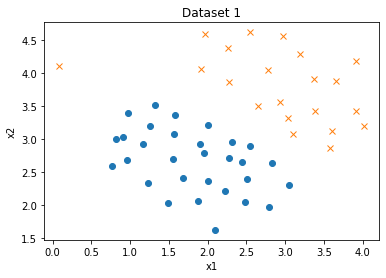

In [2]:
data = loadmat('ex6data1.mat')

dataset = np.append(data['X'],data['y'],axis=1)

X = dataset[:,:2]                                    # input training set
y = np.array([int(entry) for entry in dataset[:,2]]) # output training set with integer entries

X_neg = dataset[dataset[:,2]==0][:,:2]  # input training set of negative examples
X_pos = dataset[dataset[:,2]==1][:,:2]  # input training set of positive examples
plt.plot(X_neg[:,0],X_neg[:,1],'o')
plt.plot(X_pos[:,0],X_pos[:,1],'x')
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Dataset 1');

In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

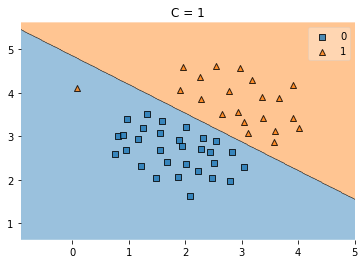

In [3]:
C = 1
clf = sklearn.svm.SVC(C=C, kernel='linear')
clf.fit(X, y); plot_decision_regions(X, y, clf=clf); plt.title('C = '+str(C)); plt.show()

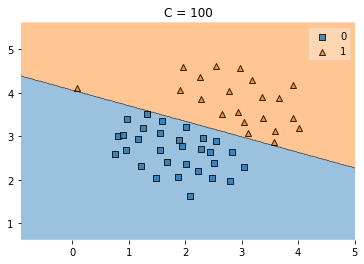

In [4]:
C = 100
clf = sklearn.svm.SVC(C=C, kernel='linear')
clf.fit(X, y); plot_decision_regions(X, y, clf=clf); plt.title('C = '+str(C)); plt.show()

By looking at two graphs above, we notice that despite the fact that the decision boundary for $C=1$ misclassifies the far left positive datapoint, it seems to be a more natural choice of boundary when we compare it against de the decision boundary for $C=100$.

### SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

The Gaussian kernel function is defined as:

$$
K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right),
$$
with $n$ being the total number of features of the input dataset.

In [5]:
def gaussiankernel(x1, x2):
    sim = 0
    sim = np.exp(-np.sum((x1 - x2)**2) / (2*(sigma**2)))
    return sim

x1 = np.array([1, 2, 1]); x2 = np.array([0, 4, -1]); sigma = 2
sim = gaussiankernel(x1, x2)
sim

0.32465246735834974

This value is in accordance with ex6.pdf.

### Dataset 2

The next part in ex6.m will load and plot dataset 2. From the figure, you can observe that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset.

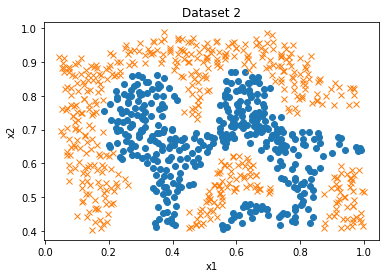

In [6]:
data = loadmat('ex6data2.mat')

dataset = np.append(data['X'],data['y'],axis=1)

X = dataset[:,:2]                                    # input training set
y = np.array([int(entry) for entry in dataset[:,2]]) # output training set with integer entries

X_neg = dataset[dataset[:,2]==0][:,:2]  # input training set of negative examples
X_pos = dataset[dataset[:,2]==1][:,:2]  # input training set of positive examples
plt.plot(X_neg[:,0],X_neg[:,1],'o')
plt.plot(X_pos[:,0],X_pos[:,1],'x')
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Dataset 2');

To try different values of C, we're going to use the function sklearn.svm.SVC( ). This functions has C and gamma as arguments, where <br>
$gamma = \frac{1}{2 sigma^{2}}$, <br>
so for instance if we want to try sigma=0.1, this will correspond approximately to gamma=50.

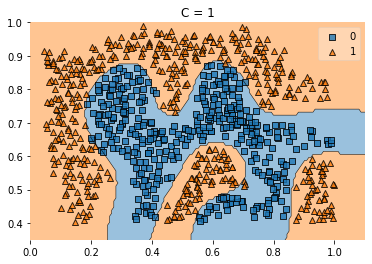

In [7]:
C = 1
gamma = 50   # this corresponds to sigma=0.1
clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y);
plot_decision_regions(X, y, clf=clf); plt.title('C = '+str(C));
plt.xlim([0, 1.1])
plt.ylim([0.35, 1])
plt.show()

### Dataset 3

In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel.

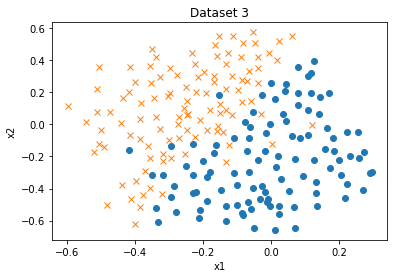

In [8]:
data = loadmat('ex6data3.mat')

dataset_tr = np.append(data['X'],data['y'],axis=1)
dataset_val = np.append(data['Xval'],data['yval'],axis=1)

X = dataset_tr[:,:2]                                    # input training set
y = np.array([int(entry) for entry in dataset_tr[:,2]]) # output training set with integer entries

Xval = dataset_val[:,:2]                                    # input training set
yval = np.array([int(entry) for entry in dataset_val[:,2]]) # output training set with integer entries

X_neg = dataset_tr[dataset_tr[:,2]==0][:,:2]  # input training set of negative examples
X_pos = dataset_tr[dataset_tr[:,2]==1][:,:2]  # input training set of positive examples
plt.plot(X_neg[:,0],X_neg[:,1],'o')
plt.plot(X_pos[:,0],X_pos[:,1],'x')
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Dataset 3');

Your task is to use the cross validation set Xval, yval to determine the best C and σ parameter to use.

In [9]:
C_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamma_list = [0.01, 0.3, 1, 30, 50, 80, 100, 150]

acc = np.zeros((len(C_list),len(gamma_list)))
for i in range(len(C_list)):
    for j in range(len(gamma_list)):
        C = C_list[i]
        gamma = gamma_list[j]   # this corresponds to sigma=0.1
        clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X, y);
        prediction = clf.predict(Xval)
        acc[i,j] = accuracy_score(yval, prediction)
C_loc = int(np.where(acc == np.max(acc))[0])
gamma_loc = int(np.where(acc == np.max(acc))[1])
print("Best value for C: "+str(C_list[C_loc]))
print("Best value for gamma: "+str(gamma_list[gamma_loc]))

Best value for C: 0.3
Best value for gamma: 80


In [10]:
# In terms of sigma, let's see how the optimal value translates:
gamma = 80
sigma = np.sqrt(1/(2*gamma))
round(sigma,1)

0.1

The best values for C and sigma are $C=0.3$ and $sigma=0.1$, which is in agreement with ex6.pdf.

Now let's train our model with these values for the parameters and plot the decicion boundary.

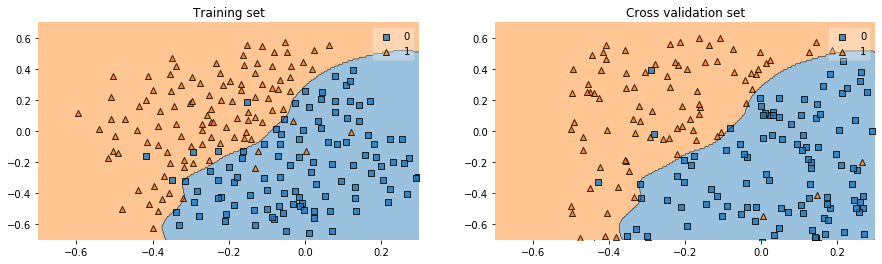

In [11]:
C = 0.3; gamma = 80
clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
# Decision boundaries:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plot_decision_regions(X, y, clf=clf); plt.title('C = '+str(C));
plt.xlim([-0.7, 0.3]); plt.ylim([-0.7, 0.7]); plt.title("Training set");
plt.subplot(1,2,2)
plot_decision_regions(Xval, yval, clf=clf); plt.title('C = '+str(C));
plt.xlim([-0.7, 0.3]); plt.ylim([-0.7, 0.7]); plt.title("Cross validation set");

## Part 2: Spam Classification

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, you need to convert each email into a feature vector x ∈ Rn.

The dataset included for this exercise is based on a subset of the [SpamAssassin Public Corpus](http://spamassassin.apache.org/old/publiccorpus/). For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).

### Preprocessing Emails

One method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the email with the unique string “httpaddr” to indicate that a URL was present.

In the function `processEmail` below, we have implemented the following email preprocessing and normalization steps:

- **Lower-casing**: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).

- **Stripping HTML**: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.

- **Normalizing URLs**: All URLs are replaced with the text “httpaddr”.

- **Normalizing Email Addresses**:  All email addresses are replaced with the text “emailaddr”.

- **Normalizing Numbers**: All numbers are replaced with the text “number”.

- **Normalizing Dollars**: All dollar signs ($) are replaced with the text “dollar”.

- **Removal of non-words**: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

- **Word Stemming**: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.

After preprocessing the emails, we have a list of words for each email. The next step is to choose which words we would like to use in our classifier and which we would want to leave out. For this exercise, we have chosen only the most frequently occuring words as our set of words considered (the vocabulary list, vocab.txt). Since words that occur rarely in the training set are only in a few emails, they might cause the model to overfit our training set. Given the vocabulary list, we can map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocabulary list. Your task now is to complete the code in processEmail.m to perform this mapping.

In [12]:
import utils # library written for this exercise in order to keep the notebook clean

def processEmail(email_contents,verbose=True):
    vocabList = utils.getVocabList()
    word_indices = []
    
    # Lower-casing:
    email_contents = email_contents.lower()
    # Stripping HTML: (Looks for any expression that starts with < and ends with > and replace it with a space)
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)
    # Normalizing URLS: (Look for strings starting with http:// or https://)
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)
    # Normalizing Email Addresses:
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    # Normalizing Numbers: (Look for one or more characters between 0-9)
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)
    # Normalizing Dollars:
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    # Removing punctuation and symbols:
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)
    # Removing empty word strings:
    email_contents = [word for word in email_contents if len(word) > 0] 
    # Steming the email contents word by word:
    stemmer = utils.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Removing any remaining non alphanumeric characters:
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)
        if len(word) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if found:
        # ====================== YOUR CODE HERE ======================
        try:
            word_indices.append(vocabList.index(word))
        except ValueError:
            pass
        # =============================================================
    if verbose:
        print('========= Processed email =========')
        print(' '.join(processed_email))
    return word_indices

In [13]:
# Reading processed email sample:
with open('emailSample1.txt') as email:
    file_contents = email.read()

word_indices = processEmail(file_contents)

# Printing its list of words labeled as numbers after mapping to the vocabulary list:
print('========= Word Indices =========')
print(word_indices)

========= Processed email =========
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
========= Word Indices =========
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


### Extracting features from emails

You will now implement the feature extraction that converts each email into a vector in $\mathbb{R}^{n}$. For this exercise, you will be using $n=\#$ words in vocabulary list. Specifically, the feature $x_{i}∈ \{0, 1\}$ for an email corresponds to whether the i-th word in the dictionary occurs in the email, which will look like this:
$$ x = \begin{bmatrix} 
0 & \dots & 1 & 0 & \dots & 1 & 0 & \dots & 0 
\end{bmatrix}^T \in \mathbb{R}^n.
$$

In [14]:
def emailFeatures(word_indices):
    vocabList = utils.getVocabList()
    n = len(vocabList)
    x = np.zeros((n,1))
    for i in range(n):
        if i in word_indices:
            x[i] = 1
    return x

word_indices = processEmail(file_contents,verbose=False)
x = emailFeatures(word_indices)
print('Shape:',x.shape); print('Number of non-zero entries:', len(x[x==1]))

Shape: (1899, 1)
Number of non-zero entries: 45


### Training SVM for Spam Classification

In the next step, we will load a preprocessed training dataset that will be used to train a SVM classifier.

In [15]:
dataset_tr = loadmat('spamTrain.mat');

X = dataset_tr['X'].astype(float)
y = dataset_tr['y'].astype(float)

print(X.shape,y.shape)

(4000, 1899) (4000, 1)


In [16]:
C = 0.1
clf = sklearn.svm.SVC(C=C, kernel='linear')
clf.fit(X,y)
p = clf.predict(X).reshape(-1,1)
print('Training accuracy: ',np.mean(p == y)*100)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy:  99.825


In [17]:
dataset_te = loadmat('spamTest.mat');

X_te = dataset_te['Xtest'].astype(float)
y_te = dataset_te['ytest'].astype(float)

print(X_te.shape,y_te.shape)

(1000, 1899) (1000, 1)


In [18]:
p = clf.predict(X_te).reshape(-1,1)
print('Test accuracy: ',np.mean(p == y_te)*100)

Test accuracy:  98.9


Both the training and the test accuracies are in agreement with ex6.pdf.

### Top Predictors for Spam

To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam. In the next step, we will find the parameters with the largest positive values in the classifier and displays the corresponding words.

In [19]:
# Weights of each of the features that were used in the classifier:
Coef = clf.coef_.flatten() 
# Index location of the features sorted by most important to least important feature:
feat_indices = np.argsort(Coef)[::-1]

vocabList = utils.getVocabList()
print('%-15s %-15s' % ('Word:', 'Weight:'))
print()
for i in feat_indices[:10]:
    print('%-15s %0.2f' % (vocabList[i],Coef[i]))

Word:           Weight:        

our             0.50
click           0.47
remov           0.42
guarante        0.38
visit           0.37
basenumb        0.35
dollar          0.32
will            0.27
price           0.27
pleas           0.26


### Optional (ungraded) exercise: Try your own emails

Now that you have trained a spam classifier, you can start trying it out on your own emails. Let's use the email and spam sample provided by the exercise.

In [20]:
def Predict(file):
    with open(file) as email:
        file_contents = email.read()  
    word_indices = processEmail(file_contents,verbose=False)
    x = emailFeatures(word_indices).T
    p = clf.predict(x).reshape(-1,1)
    if int(p)==0:
        print('Prediction: Not spam')
    else:
        print('Prediction: Spam')

In [21]:
Predict('emailSample1.txt')

Prediction: Not spam


In [22]:
Predict('emailSample2.txt')

Prediction: Not spam


In [23]:
Predict('spamSample1.txt')

Prediction: Spam


In [24]:
Predict('spamSample2.txt')

Prediction: Spam


End of exercise 6.